In [1]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from datetime import datetime, timedelta


In [2]:
# 1. Load and clean data
data = pd.read_csv("F:/Dreamteam/_temperature_data.csv")
data.columns = data.columns.str.strip()
columns_needed = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'TEMP', 'HUMIDITY', 'WIND_SPEED', 'CLOUD_COVER']
data[columns_needed] = data[columns_needed].apply(pd.to_numeric, errors='coerce')
data.dropna(subset=columns_needed, inplace=True)
data

,YEAR,MONTH,DAY,HOUR,TEMP,HUMIDITY,WIND_SPEED,CLOUD_COVER
0,2014,6,12,1,118,82,20,2.0
1,2014,6,12,2,128,80,10,3.0
2,2014,6,12,3,114,86,10,1.0
3,2014,6,12,4,117,87,10,0.0
4,2014,6,12,5,139,84,20,0.0
5,2014,6,12,6,154,77,30,0.0
6,2014,6,12,7,167,69,30,0.0
7,2014,6,12,8,176,63,40,0.0
8,2014,6,12,9,185,53,40,0.0
9,2014,6,12,10,199,51,40,4.0


In [3]:
# 2. Filter for specific time
month = 9
hour = 10
df = data[(data['MONTH'] == month) & (data['HOUR'] == hour)].copy()
df

,YEAR,MONTH,DAY,HOUR,TEMP,HUMIDITY,WIND_SPEED,CLOUD_COVER
1953,2014,9,1,10,157,81,20,2.0
1977,2014,9,2,10,202,60,20,6.0
2001,2014,9,3,10,179,65,60,1.0
2025,2014,9,4,10,193,70,50,1.0
2049,2014,9,5,10,213,66,20,1.0
2073,2014,9,6,10,196,81,30,8.0
2097,2014,9,7,10,185,78,10,4.0
2121,2014,9,8,10,148,98,20,8.0
2145,2014,9,9,10,159,72,30,8.0
2169,2014,9,10,10,150,74,40,7.0


In [4]:
# 3. Calculate TEMP_CHANGE and prepare training data
df['TEMP_CHANGE'] = df['TEMP'].diff().shift(-1)
df_trimmed = df.iloc[:-1]
last_row = df.iloc[[-1]].drop('TEMP_CHANGE', axis=1)

feature_cols = ['TEMP', 'HUMIDITY', 'WIND_SPEED', 'CLOUD_COVER']
X = df_trimmed[feature_cols]
y = df_trimmed['TEMP_CHANGE']
df_trimmed

,YEAR,MONTH,DAY,HOUR,TEMP,HUMIDITY,WIND_SPEED,CLOUD_COVER,TEMP_CHANGE
1953,2014,9,1,10,157,81,20,2.0,45.0
1977,2014,9,2,10,202,60,20,6.0,-23.0
2001,2014,9,3,10,179,65,60,1.0,14.0
2025,2014,9,4,10,193,70,50,1.0,20.0
2049,2014,9,5,10,213,66,20,1.0,-17.0
2073,2014,9,6,10,196,81,30,8.0,-11.0
2097,2014,9,7,10,185,78,10,4.0,-37.0
2121,2014,9,8,10,148,98,20,8.0,11.0
2145,2014,9,9,10,159,72,30,8.0,-9.0
2169,2014,9,10,10,150,74,40,7.0,21.0


In [5]:
# 4. Train the model
model = LinearRegression()
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# 5. Predict next temperature change
y_pred = model.predict(last_row[feature_cols])[0]
last_row['TEMP_CHANGE'] = y_pred
df = df.iloc[:-1]  # remove old last row
df = df.append(last_row, ignore_index=True)
df

,YEAR,MONTH,DAY,HOUR,TEMP,HUMIDITY,WIND_SPEED,CLOUD_COVER,TEMP_CHANGE
0,2014,9,1,10,157,81,20,2.0,45.000000
1,2014,9,2,10,202,60,20,6.0,-23.000000
2,2014,9,3,10,179,65,60,1.0,14.000000
3,2014,9,4,10,193,70,50,1.0,20.000000
4,2014,9,5,10,213,66,20,1.0,-17.000000
5,2014,9,6,10,196,81,30,8.0,-11.000000
6,2014,9,7,10,185,78,10,4.0,-37.000000
7,2014,9,8,10,148,98,20,8.0,11.000000
8,2014,9,9,10,159,72,30,8.0,-9.000000
9,2014,9,10,10,150,74,40,7.0,21.000000


In [7]:
# Step 1: Get the datetime of the last_row
last_datetime = pd.to_datetime({
    'year': [int(last_row['YEAR'].values[0])],
    'month': [int(last_row['MONTH'].values[0])],
    'day': [int(last_row['DAY'].values[0])],
    'hour': [int(last_row['HOUR'].values[0])]
})[0]

# Step 2: Generate next 12 hourly datetimes
next_12_hours = [last_datetime + timedelta(hours=i) for i in range(1, 13)]
next_12_df = pd.DataFrame(next_12_hours, columns=['DATETIME'])

# # Step 3: Convert the original data to datetime for filtering
data['DATETIME'] = pd.to_datetime(data[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# # Step 4: Filter the original data for next 12 hours
future_data = data[data['DATETIME'].isin(next_12_df['DATETIME'])].copy()
future_data['TEMP_CHANGE'] = future_data['TEMP'].diff().shift(-1)
# # Display the result
print(future_data)
# print(next_12_df)


       YEAR  MONTH  DAY  HOUR  TEMP  HUMIDITY  WIND_SPEED  CLOUD_COVER  \
81538  2023      9   30    11   166        75          20          8.0   
81539  2023      9   30    12   171        72          20          8.0   
81540  2023      9   30    13   176        71          30          4.0   
81541  2023      9   30    14   178        64          30          8.0   
81542  2023      9   30    15   173        64          20          8.0   
81543  2023      9   30    16   174        62          10          8.0   
81544  2023      9   30    17   161        70          10          8.0   
81545  2023      9   30    18   133        87          10          8.0   
81546  2023      9   30    19   126        90          10          8.0   
81547  2023      9   30    20   126        88          20          8.0   
81548  2023      9   30    21   124        88          20          2.0   
81549  2023      9   30    22   116        84          30          2.0   

                 DATETIME  TEMP_CHANG

In [9]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from datetime import timedelta

# Assume last_row, model, data, and future_data are already defined as in your code

# Step 6: Forecast future temperatures
predictions = []

# Convert last_row to dictionary for feature reuse
current_data = last_row.iloc[0].to_dict()

# Loop through each row of the future_data
for index, row in future_data.iterrows():
    temp_input = {
        'TEMP': row['TEMP'],
        'HUMIDITY': current_data['HUMIDITY'],
        'WIND_SPEED': current_data['WIND_SPEED'],
        'CLOUD_COVER': current_data['CLOUD_COVER']
    }

    input_df = pd.DataFrame([temp_input])
    predicted_change = model.predict(input_df)[0]

    new_row = {
        'YEAR': row['YEAR'],
        'MONTH': row['MONTH'],
        'DAY': row['DAY'],
        'HOUR': row['HOUR'],
        'TEMP': row['TEMP'],
        'TEMP_CHANGE': row['TEMP_CHANGE'],
        'HUMIDITY': current_data['HUMIDITY'],
        'WIND_SPEED': current_data['WIND_SPEED'],
        'CLOUD_COVER': current_data['CLOUD_COVER'],
        'PREDICTED_TEMP_CHANGE': predicted_change
    }

    predictions.append(new_row)

# Step 7: Convert to DataFrame
predicted_df = pd.DataFrame(predictions)

# Display result
print(predicted_df)


    CLOUD_COVER  DAY  HOUR  HUMIDITY  MONTH  PREDICTED_TEMP_CHANGE  TEMP  \
0           1.0   30    11      88.0      9              17.471121   166   
1           1.0   30    12      88.0      9              16.353302   171   
2           1.0   30    13      88.0      9              15.235483   176   
3           1.0   30    14      88.0      9              14.788356   178   
4           1.0   30    15      88.0      9              15.906175   173   
5           1.0   30    16      88.0      9              15.682611   174   
6           1.0   30    17      88.0      9              18.588940   161   
7           1.0   30    18      88.0      9              24.848725   133   
8           1.0   30    19      88.0      9              26.413671   126   
9           1.0   30    20      88.0      9              26.413671   126   
10          1.0   30    21      88.0      9              26.860799   124   
11          1.0   30    22      88.0      9              28.649309   116   

    TEMP_CH

In [11]:
predicted_df['TEMP']=predicted_df['TEMP']/10
predicted_df

,CLOUD_COVER,DAY,HOUR,HUMIDITY,MONTH,PREDICTED_TEMP_CHANGE,TEMP,TEMP_CHANGE,WIND_SPEED,YEAR
0,1.0,30,11,88.0,9,17.471121,16.6,5.0,20.0,2023
1,1.0,30,12,88.0,9,16.353302,17.1,5.0,20.0,2023
2,1.0,30,13,88.0,9,15.235483,17.6,2.0,20.0,2023
3,1.0,30,14,88.0,9,14.788356,17.8,-5.0,20.0,2023
4,1.0,30,15,88.0,9,15.906175,17.3,1.0,20.0,2023
5,1.0,30,16,88.0,9,15.682611,17.4,-13.0,20.0,2023
6,1.0,30,17,88.0,9,18.588940,16.1,-28.0,20.0,2023
7,1.0,30,18,88.0,9,24.848725,13.3,-7.0,20.0,2023
8,1.0,30,19,88.0,9,26.413671,12.6,0.0,20.0,2023
9,1.0,30,20,88.0,9,26.413671,12.6,-2.0,20.0,2023


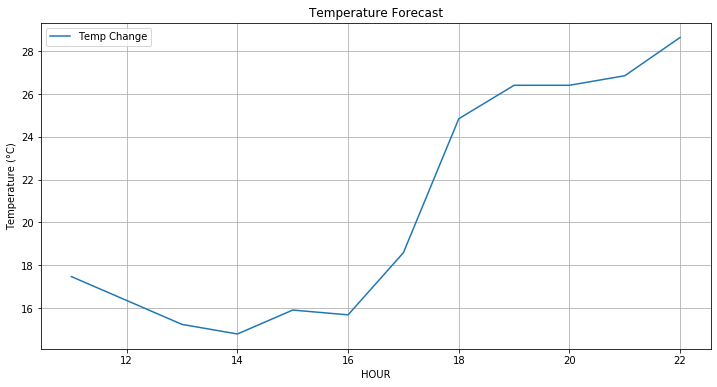

In [13]:
# 9. Plot results
plt.figure(figsize=(12, 6))
# plt.plot(predicted_df['HOUR'],predicted_df['TEMP_CHANGE'], label='Actual Temp')
plt.plot(predicted_df['HOUR'],predicted_df['PREDICTED_TEMP_CHANGE'], label='Temp Change')
plt.title('Temperature Forecast')
plt.xlabel('HOUR')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()